# Esperienza 5-6

In [2]:
from ROOT import TMultiGraph, TGraphErrors, TAxis, TCanvas, TF1, TFitResult, TLegend, TLatex #, gStyle
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from uncertainties import ufloat,unumpy

Welcome to JupyROOT 6.22/02


## Diodi

- generatore DC ($20\; V$): EUTRON BV60 S20-2
- diodo: BY255P 1805J
- resistenza: $R = 1\;k\Omega$
- multimetri: AMPROBE 37XR-A


    DC Voltage: Resolution 100 μV
    Ranges 1000 mV, 10 V, 100 V, 1000 V  ± (0.1 % rdg + 5 dgt)
    
    DC Current: Resolution 0.01 μA
    Ranges 100 μA, 1000 μA, 10 mA, 100 mA, 400 mA, 10 A
    100 μA range: ± (0.5 % rdg + 10 dgt)
    1000 uA to 400 mA ranges: ± (0.5 % rdg + 5 dgts)
    10 A range: ± (1.5 % rdg + 10 dgt)

In [3]:
# Vd [mV]: tensione ai capi del diodo
V = np.array([250., 417.7, 485.5, 511.2, 528.6, 541.4, 552., 560.7, 568.1, 574.3, 579.7, 584.3,588.6,
              593.5, 600.4,606.4, 612., 616.6, 620.9, 624.8, 628.5, 631.6, 97.5, 191.5, 302.8, 381.4])

# Id [mA]: corrente passante nel diodo
I = np.array([4.3e-4, 0.0406, 0.256, 0.485, 0.686, 0.923, 1.155, 1.392, 1.63, 1.855, 2.089, 2.324, 2.566,
              2.798, 3.276, 3.744, 4.224, 4.694, 5.167, 5.655, 6.133, 6.594, 5e-5, 1.2e-4, 12.4e-4, 112.5e-4])

n = np.size(V) # numero di misure

#incertezze sulle misure
Verr = np.array([0.1 * V[i] / 100 + 5 * 0.1 for i in range(n) if V[i] <= 1000])
Ierr = np.array([(I[i]*1e3 * 0.5/100 + 10*1e-2)*1e-3 * 45 if I[i] <= 100e-3  # riscalato di 45
                 else I[i]*0.5/100 + 5*1e-3
                 for i in range(n)])
n

26

In [3]:
####DATAPRINT#####
data = np.array([V,Verr,I,Ierr])
df = pd.DataFrame(data,
                  index=pd.MultiIndex.from_tuples([('diodo','$V_d$ [mV]'),('diodo','$\delta_{V_d}$ [mV]'),('diodo','$I_d$ [mA]'),('diodo','$\delta_{I_d}$ [mA]')]),
                  columns=np.arange(1,n+1))
df.T

diodo                                                   
   $V_d$ [mV] $\delta_{V_d}$ [mV] $I_d$ [mA] $\delta_{I_d}$ [mA]
1       250.0              0.7500    0.00043            0.004597
2       417.7              0.9177    0.04060            0.013635
3       485.5              0.9855    0.25600            0.006280
4       511.2              1.0112    0.48500            0.007425
5       528.6              1.0286    0.68600            0.008430
6       541.4              1.0414    0.92300            0.009615
7       552.0              1.0520    1.15500            0.010775
8       560.7              1.0607    1.39200            0.011960
9       568.1              1.0681    1.63000            0.013150
10      574.3              1.0743    1.85500            0.014275
11      579.7              1.0797    2.08900            0.015445
12      584.3              1.0843    2.32400            0.016620
13      588.6              1.0886    2.56600            0.017830
14      593.5              1.0935    2.79800            0.018990
15      600.4              1.1004    3.27600            0.021380
16      606.4              1.1064    3.74400            0.023720
17      612.0              1.1120    4.22400            0.026120
18      616.6              1.1166    4.69400            0.028470
19      620.9              1.1209    5.16700            0.030835
20      624.8              1.1248    5.65500            0.033275
21      628.5              1.1285    6.13300            0.035665
22      631.6              1.1316    6.59400            0.037970
23       97.5              0.5975    0.00005            0.004511
24      191.5              0.6915    0.00012            0.004527
25      302.8              0.8028    0.00124            0.004779
26      381.4              0.8814    0.01125            0.007031

                        
Chi^2          12.743417
number of DoF  24.000000
Probability     0.970164


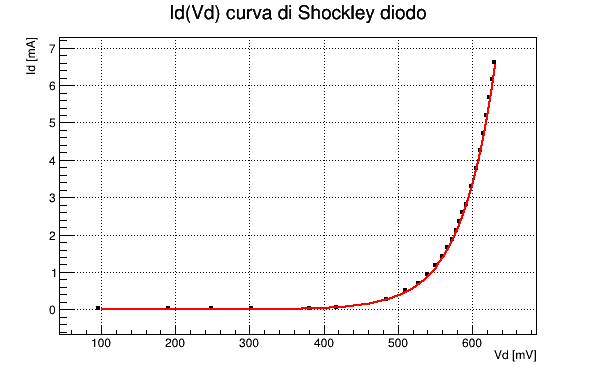

 FCN=12.7434 FROM HESSE     STATUS=OK             10 CALLS         172 TOTAL
                     EDM=1.04126e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.31227e-06   5.61166e-07   1.29783e-11  -2.25136e+03
   2  p1           1.75361e+00   1.21850e-02   4.18092e-07   1.13290e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cIV
Info in <TCanvas::Print>: png file Shockley_curve_diode.png has been created


In [4]:
#GRAFICO Id(Vd)
cIV = TCanvas("cIV", "Id(Vd)", 200, 10, 600, 400)
cIV.SetFillColor(0)
cIV.cd()
gIV = TGraphErrors(n, V, I, Verr, Ierr)
gIV.SetMarkerSize(0.6)
gIV.SetMarkerStyle(21)
gIV.SetTitle("Id(Vd) curva di Shockley diodo")
gIV.GetXaxis().SetTitle("Vd [mV]")
gIV.GetYaxis().SetTitle("Id [mA]")
cIV.SetGrid()
#cIV.SetLogy(1)
gIV.Draw("AP")


#FIT Id(Vd)
IV = TF1("IV", "[0] * (exp(x / ([1]*26.)) - 1)", np.min(V), np.max(V)+2.5)
IV.SetParameter(0, 1e-6) # Is [mA]
IV.SetParameter(1, 2) # eta
#IV.SetParLimits(0, 0, 1)
#IV.SetParLimits(1, 0, 3)
IV.SetLineColor(2)
gIV.Fit(IV, "RM+")
cIV.Show()
cIV.Print("Shockley_curve_diode.png")

testchi2 = pd.DataFrame([IV.GetChisquare(), IV.GetNDF(), IV.GetProb()], 
                        index = ["Chi^2", "number of DoF", "Probability"],columns=[""])
print(testchi2)
IVimage = Image(filename='Shockley_curve_diode.png')
IVimage

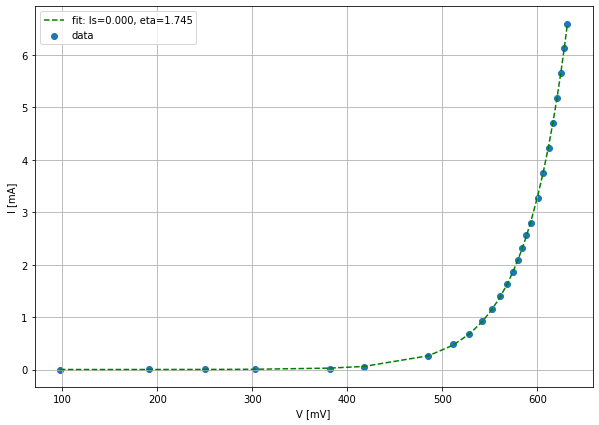

array([5.91138568e-06, 1.74522776e+00])

In [4]:
def Shockley_curve(V, Is, eta):
    return Is * (np.exp(V / (eta*26.)) - 1)

plt.figure(figsize=(10, 7))
plt.scatter(np.sort(V), np.sort(I), label='data')
popt, pcov = curve_fit(Shockley_curve, np.sort(V), np.sort(I), bounds=(0, [10, 3]))
plt.plot(np.sort(V), Shockley_curve(np.sort(V), *popt), 'g--', label='fit: Is=%5.3f, eta=%5.3f' % tuple(popt))
plt.xlabel('V [mV]')
plt.ylabel('I [mA]')
plt.grid()
plt.legend()
plt.show()
popt

#### LED

In [16]:
# Vd [V]: tensione ai capi del LED
V = np.array([0.1043,0.207,0.254,0.3006,0.4001,0.504,0.7568,0.996,1.257,1.505,1.704,1.757,1.781,1.796,1.807,1.818,1.833,1.882,1.875,1.877,
             1.888,1.896,1.902,1.98,1.915,1.92,1.925,1.931,1.843,1.855,1.864,1.71,1.942,1.952,1.962,1.97,1.979,1.988,2.005,2.022])
# Id [mA]: corrente ai capi del LED
I = np.array([5e-5,6e-5,6e-5,7e-5,8e-5,9e-5,11e-5,14e-5,17e-5,43e-5,0.02622,0.1213,0.2341,0.3516,0.4678,0.5094,0.8243,2.041,1.8,1.903,
             2.273,2.512,1.737,2.979,3.201,3.442,3.672,3.21,1.039,1.294,1.511,1.702,4.363,4.04,5.321,5.779,6.25,6.717,7.66,8.633])

n = np.size(V) # numero di misure
#incertezze sulle misure
Verr = np.array([(0.1 * V[i]*1e3 / 100 + 5 * 0.1)*1e-3 if V[i] < 1.
                 else 0.1 * V[i] / 100 + 5 * 0.001
                 for i in range(n)])
Ierr = np.ones(n)
for i in range(n):
    if I[i] < 0.1: Ierr[i] = (I[i]*1e3 * 0.5/100 + 10*1e-5)*1e-3
    if I[i] >= 0.1 and I[i] < 1.: Ierr[i] = (I[i] * 0.5/100 + 10*1e-4)
    if I[i] >=1.: Ierr[i] = I[i] * 0.5/100 + 5*1e-3

In [50]:
####DATAPRINT#####
data = np.array([V,Verr,I,Ierr])
df = pd.DataFrame(data,
                  index=pd.MultiIndex.from_tuples([('LED','$V_d$ [mV]'),('LED','$\delta_{V_d}$ [mV]'),('LED','$I_d$ [mA]'),('LED','$\delta_{I_d}$ [mA]')]),
                  columns=np.arange(1,n+1))
df.T

LED                                                   
   $V_d$ [mV] $\delta_{V_d}$ [mV] $I_d$ [mA] $\delta_{I_d}$ [mA]
1      0.1043            0.000604    0.00005        3.500000e-07
2      0.2070            0.000707    0.00006        4.000000e-07
3      0.2540            0.000754    0.00006        4.000000e-07
4      0.3006            0.000801    0.00007        4.500000e-07
5      0.4001            0.000900    0.00008        5.000000e-07
6      0.5040            0.001004    0.00009        5.500000e-07
7      0.7568            0.001257    0.00011        6.500000e-07
8      0.9960            0.001496    0.00014        8.000000e-07
9      1.2570            0.006257    0.00017        9.500000e-07
10     1.5050            0.006505    0.00043        2.250000e-06
11     1.7040            0.006704    0.02622        1.312000e-04
12     1.7570            0.006757    0.12130        1.606500e-03
13     1.7810            0.006781    0.23410        2.170500e-03
14     1.7960            0.006796    0.35160        2.758000e-03
15     1.8070            0.006807    0.46780        3.339000e-03
16     1.8180            0.006818    0.50940        3.547000e-03
17     1.8330            0.006833    0.82430        5.121500e-03
18     1.8820            0.006882    2.04100        1.520500e-02
19     1.8750            0.006875    1.80000        1.400000e-02
20     1.8770            0.006877    1.90300        1.451500e-02
21     1.8880            0.006888    2.27300        1.636500e-02
22     1.8960            0.006896    2.51200        1.756000e-02
23     1.9020            0.006902    1.73700        1.368500e-02
24     1.9800            0.006980    2.97900        1.989500e-02
25     1.9150            0.006915    3.20100        2.100500e-02
26     1.9200            0.006920    3.44200        2.221000e-02
27     1.9250            0.006925    3.67200        2.336000e-02
28     1.9310            0.006931    3.21000        2.105000e-02
29     1.8430            0.006843    1.03900        1.019500e-02
30     1.8550            0.006855    1.29400        1.147000e-02
31     1.8640            0.006864    1.51100        1.255500e-02
32     1.7100            0.006710    1.70200        1.351000e-02
33     1.9420            0.006942    4.36300        2.681500e-02
34     1.9520            0.006952    4.04000        2.520000e-02
35     1.9620            0.006962    5.32100        3.160500e-02
36     1.9700            0.006970    5.77900        3.389500e-02
37     1.9790            0.006979    6.25000        3.625000e-02
38     1.9880            0.006988    6.71700        3.858500e-02
39     2.0050            0.007005    7.66000        4.330000e-02
40     2.0220            0.007022    8.63300        4.816500e-02

Chi^2: 895.3484719637601 , number of DoF:  27  (Probability:  3.1168257421435752e-171 ).


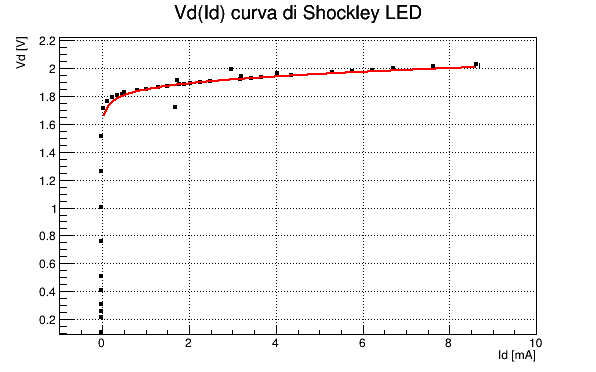

 FCN=895.348 FROM MIGRAD    STATUS=CALL LIMIT   1354 CALLS        1355 TOTAL
                     EDM=14.241    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  18.7 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.84244e+14   1.79338e+13   4.45366e+13  -9.26577e-13
   2  p1           5.59774e-02   2.08449e-04  -5.23262e-04  -8.50152e+04
   3  p2           5.32494e-03   6.20265e-04  -1.83634e-03   1.84504e+03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cVI
Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: png file Shockley_curve_led.png has been created


In [24]:
#GRAFICO Vd(Id)
cVI = TCanvas("cVI", "Vd(Id)", 200, 10, 600, 400)
cVI.SetFillColor(0)
cVI.cd()
gVI = TGraphErrors(n, I, V, Ierr, Verr)
gVI.SetMarkerSize(0.6)
gVI.SetMarkerStyle(21)
gVI.SetTitle("Vd(Id) curva di Shockley LED")
gVI.GetXaxis().SetTitle("Id [mA]")
gVI.GetYaxis().SetTitle("Vd [V]")
gVI.GetXaxis().SetLimits(-1.,10.)
gVI.GetYaxis().SetLimits(-10.,2.2)
cVI.SetGrid()
#cVI.SetLogx(1)
gVI.Draw("AP")

#FIT Id(Vd)
VI = TF1("VI", "[1]*log(x*[0] + 1) + [2]*x", np.min(I)+0.0005, np.max(I))
#gStyle.SetOptFit (112)# superimpose fit results59
VI.SetParameter(0, 6e5) # Is^(-1)
VI.SetParameter(1, 0.136) # eta * Vt, Vt = 0.026
VI.SetParameter(2, 1) # Rd [kOhm]
#VI.SetParLimits(0, 0, 1e12)
#VI.SetParLimits(1, 0, 3)
VI.SetParLimits(2, 0, 1e1)
VI.SetLineColor(2)
fitResults = gVI.Fit(VI, "RMS+")
cVI.Print("Shockley_curve_led.png")
VIimage = Image(filename='Shockley_curve_led.png')
print("Chi^2:", VI.GetChisquare(), ", number of DoF: ", VI.GetNDF(), " (Probability: ", VI.GetProb(), ").")
VIimage

In [21]:
# sovrascrittura per scarto delle misure
modV = np.array([0.1043,0.207,0.254,0.3006,0.4001,0.504,0.7568,0.996,1.257,1.505,1.704,1.757,1.781,1.796,1.807,1.818,1.833,1.882,1.875,1.877,
             1.888,1.896,1.915,1.92,1.925,1.931,1.843,1.855,1.864,1.942,1.952,1.962,1.97,1.979,1.988,2.005,2.022])
modI = np.array([5e-5,6e-5,6e-5,7e-5,8e-5,9e-5,11e-5,14e-5,17e-5,43e-5,0.02622,0.1213,0.2341,0.3516,0.4678,0.5094,0.8243,2.041,1.8,1.903,
             2.273,2.512,3.201,3.442,3.672,3.21,1.039,1.294,1.511,4.363,4.04,5.321,5.779,6.25,6.717,7.66,8.633])

modn = np.size(modV) # numero di misure
#incertezze sulle misure
modVerr = np.array([(0.1 * modV[i]*1e3 / 100 + 5 * 0.1)*1e-3 if modV[i] < 1.
                 else 0.1 * modV[i] / 100 + 5 * 0.001
                 for i in range(modn)])
modIerr = np.ones(modn)
for i in range(modn):
    if modI[i] < 0.1: modIerr[i] = (modI[i]*1e3 * 0.5/100 + 10*1e-5)*1e-3
    if modI[i] >= 0.1 and modI[i] < 1.: modIerr[i] = (modI[i] * 0.5/100 + 10*1e-4)
    if modI[i] >=1.: modIerr[i] = (modI[i] * 0.5/100 + 5*1e-3)
        
#misure scartate


Chi^2: 12.918062235065456 , number of DoF:  24  (Probability:  0.96745167763095 ).


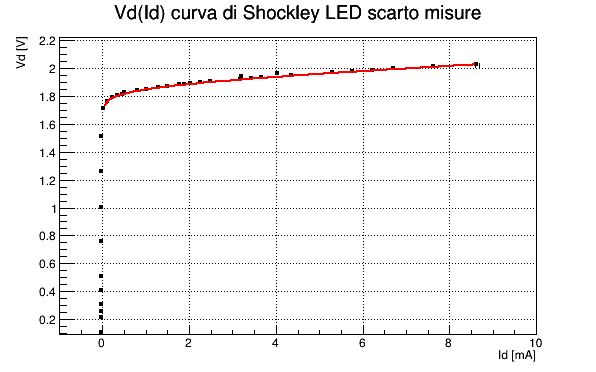

 FCN=12.9181 FROM HESSE     STATUS=OK             22 CALLS         168 TOTAL
                     EDM=1.02174e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.90573e+22   1.46570e+22   4.13800e+19  -1.43945e-25
   2  p1           3.56845e-02   5.45110e-04   9.35017e-09  -3.85171e+00
   3  p2           1.35480e-02   6.24196e-04   3.56952e-07   1.94214e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cVI
Info in <TCanvas::Print>: png file Shockley_curve_led scarto misure.png has been created


In [22]:
#GRAFICO Vd(Id)
modcVI = TCanvas("cVI", "Vd(Id)", 200, 10, 600, 400)
modcVI.SetFillColor(0)
modcVI.cd()
modgVI = TGraphErrors(modn, modI, modV, modIerr, modVerr)
modgVI.SetMarkerSize(0.6)
modgVI.SetMarkerStyle(21)
modgVI.SetTitle("Vd(Id) curva di Shockley LED scarto misure")
modgVI.GetXaxis().SetTitle("Id [mA]")
modgVI.GetYaxis().SetTitle("Vd [V]")
modgVI.GetXaxis().SetLimits(-1.,10.)
modgVI.GetYaxis().SetLimits(-10.,2.2)
modcVI.SetGrid()
#modcVI.SetLogx(1)
modgVI.Draw("AP")

#FIT Id(Vd)
modVI = TF1("modVI", "[1]*log(x*[0] + 1) + [2]*x", np.sort(I)[10], np.max(I))
modVI.SetParameter(0, 1.905e22) # Is^(-1)
modVI.SetParameter(1, 3.56e-2) # eta * Vt, Vt = 0.026
modVI.SetParameter(2, 1.354e-2) # Rd [kOhm]
#modVI.SetParLimits(0, 0, 1e12)
#modVI.SetParLimits(1, 0, 3)
modVI.SetParLimits(2, 0, 1e1)
modVI.SetLineColor(2)
fitResults = modgVI.Fit(modVI, "RMS+")
modcVI.Print("Shockley_curve_led scarto misure.png")
print("Chi^2:", modVI.GetChisquare(), ", number of DoF: ", modVI.GetNDF(), " (Probability: ", modVI.GetProb(), ").")
modVIimage = Image(filename='Shockley_curve_led scarto misure.png')
modVIimage

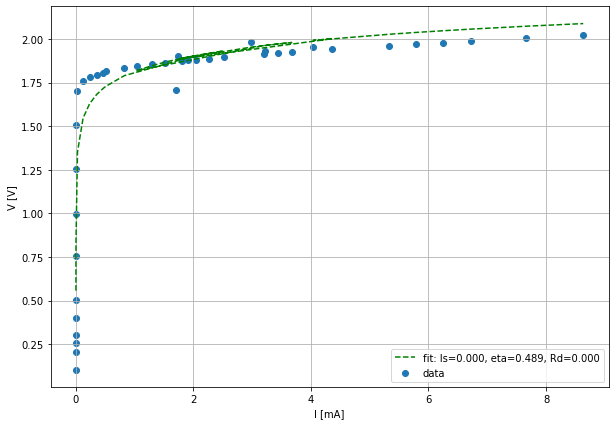

array([6.35750873e-07, 4.89034896e-01, 7.97824009e-17])

<Figure size 432x288 with 0 Axes>

In [164]:
def trascendent_Shockley_curve(I, Is, eta, Rd):
    #eta*0.26*log(x/Is + 1) + Rd*x
    return eta*0.26*np.log(I/Is + 1) + Rd*I

plt.figure(figsize=(10, 7))
plt.scatter(I, V, label='data')
popt, pcov = curve_fit(trascendent_Shockley_curve, I, V, bounds=(0, [10, 3, 100]))
plt.plot(I, trascendent_Shockley_curve(I, *popt), 'g--', label='fit: Is=%5.3f, eta=%5.3f, Rd=%5.3f' % tuple(popt))
plt.xlabel('I [mA]')
plt.ylabel('V [V]')
plt.grid()
plt.legend()
plt.show()
#plt.savefig("grafico2.png")
popt

## Transistor

- generatore DC $V_{bb}$ ($20\; V$, $4.5\; A$): EUTRON BV140
- generatore  DC $V_{cc}$ ($20\; V$): EUTRON BV60 S20-2
- tester analogico: ICE Super Tester 680R
- resistenza: $R = 10\;k\Omega$
- transistor: RCA30A TIP31A-EQV; RCA HN 7907 $P_{max}=1\;W$
- multimetri: AMPROBE 37XR-A


    DC Voltage: Resolution 100 μV
    Ranges 1000 mV, 10 V, 100 V, 1000 V  ± (0.1 % rdg + 5 dgt)
    
    DC Current: Resolution 0.01 μA
    Ranges 100 μA, 1000 μA, 10 mA, 100 mA, 400 mA, 10 A
    100 μA range: ± (0.5 % rdg + 10 dgt)
    1000 uA to 400 mA ranges: ± (0.5 % rdg + 5 dgts)
    10 A range: ± (1.5 % rdg + 10 dgt)

In [27]:
#Dati e misure
#help(pd.read_excel)
Vbe_base = np.array([0.653, 0.574, np.nan]) # [V]
Ib_base = np.array([100., 150., 200.]) # [uA]

Ib = [[100,100,100,100,90,90,90,90,90,100,np.nan,np.nan,np.nan],
               [150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,145,
                145,145,145,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140],
               [200,200,200,200,200,200,200,200,200,200,190,190,190,190,190,190,190,190,190,190,190,190]] # [uA]

Vce = [[0.0053,0.015,0.023,0.0292,0.7685,1.012,1.261,1.499,1.756,0.1111,0.2038,0.3255,0.456], 
                [0.0048,0.0108,0.0132,0.0155,0.0179,0.0189,0.0199,0.0209,0.022,0.0228,0.0238,0.0246,0.0255,0.0264,0.0273,0.0557,0.0751,0.0812,
                 0.0908,0.1006,0.1102,0.1334,0.1532,0.1738,0.2053,0.3007,0.6858,0.7426,0.785,0.836,0.8812,1.127,2.47,3.406,4.126,6.019],
                [0.0048,0.0063,0.011,0.0201,0.0409,0.0548,0.0638,0.074,0.0835,0.0943,0.1063,
                 0.125,0.1516,0.1772,0.2013,0.2546,0.3085,0.5006,1.065,2.043,4.134,6.059]] # [V]

Vbe = [[0.535,0.543,0.55,0.555,0.637,0.637,0.637,0.637,0.637,0.603,0.627,0.629,0.63],
                [0.574,0.580,0.582,0.584,0.587,0.588,0.589,0.590,0.590,0.591,0.592,0.0593,0.0594,0.595,0.595,0.618,0.633,0.638,
                 0.644,0.651,0.656,0.668,0.675,0.681,0.685,0.688,0.689,0.689,0.688,0.688,0.688,0.688,0.689,0.689,0.689,0.688],
                [0.61,0.613,0.618,0.626,0.645,0.657,0.664,0.672,0.679,0.686,0.694,
                 0.706,0.718,0.725,0.73,0.733,0.734,0.734,0.735,0.735,0.735,0.735]] # [V]

Ic = [[0.00035,0.2341,0.4796,0.7177,19.95,20.24,20.48,20.72,20.96,8.808,17.81,18.91,19.02],
               [0.00423,0.1969,0.2893,0.3843,0.4893,0.5837,0.5836,0.6315,0.6843,0.7295,0.7784,0.8241,0.8731,0.9259,0.9783,3.477,6.3,
                7.413,9.328,11.47,13.72,19.31,23.65,27.09,30.19,32.38,33.46,33.6,33.68,33.8,33.89,34.4,35.86,37.21,38.09,40.53],
               [0.00451,0.006202,0.2775,0.7999,2.625,4.506,6.05,8.131,10.31,13.27,
                16.86,22.99,31.47,37.89,41.77,45.19,46.04,46.8,48.24,50.26,54.05,58.]] # [mA]

nesp = np.size(Ib_base)
ndata = [len(Ic[0]),len(Ic[1]),len(Ic[2])]
ndata

[13, 36, 22]

In [28]:
#incertezze sulle misure
Ib_err = [[],[],[]]
Vce_err = [[],[],[]]
Vbe_err = [[],[],[]]
Ic_err = [[],[],[]]

for j in range(nesp):
    for i in range(ndata[j]):
        #Ic_err
        if Ic[j][i] < 0.1: Ic_err[j].append((Ic[j][i]*1e3 * 0.5/100 + 10*1e-5)*1e-3)
        if Ic[j][i] >= 0.1 and Ic[j][i] < 1.: Ic_err[j].append((Ic[j][i] * 0.5/100 + 10*1e-4))
        if Ic[j][i] >=1.: Ic_err[j].append(Ic[j][i] * 0.5/100 + 5*1e-3)
        
        #Ib_err
        if Ib[j][i] < 0.1: Ib_err[j].append((Ib[j][i]*1e3 * 0.5/100 + 10*1e-5)*1e-3)
        if Ib[j][i] >= 0.1 and Ib[j][i] < 1.: Ib_err[j].append((Ib[j][i] * 0.5/100 + 10*1e-4))
        if Ib[j][i] >=1.: Ib_err[j].append(Ib[j][i] * 0.5/100 + 5*1e-3)
        
        #Vce_err
        if Vce[j][i] < 1: Vce_err[j].append((Vce[j][i]*1e3 * 0.1/100 + 5*1e-1)*1e-3)
        if Vce[j][i] >= 1 and Vce[j][i] < 10.: Vce_err[j].append(Vce[j][i] * 0.1/100 + 5*1e-3)
            
        #Vbe_err
        if Vbe[j][i] < 1: Vbe_err[j].append((Vbe[j][i]*1e3 * 0.1/100 + 5*1e-1)*1e-3)
        if Vbe[j][i] >= 1 and Vbe[j][i] < 10.: Vbe_err[j].append(Vbe[j][i] * 0.1/100 + 5*1e-3)      


$\\I_c = f(V_{ce}), I_b = cost$

In [29]:
#CANVAS Ic(Vce)
cIcVce = TCanvas("cIcVce", "Ic(Vce)", 200, 10, 600, 400)
cIcVce.SetFillColor(0)
cIcVce.SetGrid()
cIcVce.cd()

mgIcVce = TMultiGraph("mgIcVce","mgIcVce")
mgIcVce.SetTitle("Ic(Vce); Vce [V]; Ic [mA]")
testchi2 = np.array([0,0,0])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cIcVce


In [30]:
#GRAFICO Ic(Vce)
#grafico1
gIcVce1 = TGraphErrors(13,Vce[0], Ic[0], Vce_err[0], Ic_err[0])
gIcVce1.SetName("gIcVce_1")
gIcVce1.SetTitle("Ic(Vce)_1")
gIcVce1.SetMarkerSize(0.6)
gIcVce1.SetMarkerStyle(21)
#gIcVce1.SetMarkerColor(2)
gIcVce1.SetDrawOption("AP")
mgIcVce.Add(gIcVce1)

#grafico2
gIcVce2 = TGraphErrors(36, Vce[1], Ic[1], Vce_err[1], Ic_err[1])
gIcVce2.SetName("gIcVce_2")
gIcVce2.SetTitle("Ic(Vce)_2")
gIcVce2.SetMarkerSize(0.6)
gIcVce2.SetMarkerStyle(21)
#gIcVce2.SetMarkerColor(2)
gIcVce2.SetDrawOption("AP")
mgIcVce.Add(gIcVce2)

#grafico3
gIcVce3 = TGraphErrors(22, Vce[2], Ic[2], Vce_err[2], Ic_err[2])
gIcVce3.SetName("gIcVce_3")
gIcVce3.SetTitle("Ic(Vce)_3")
gIcVce3.SetMarkerSize(0.6)
gIcVce3.SetMarkerStyle(21)
#gIcVce3.SetMarkerColor(2)
gIcVce3.SetDrawOption("AP")
mgIcVce.Add(gIcVce3)

TypeError: none of the 9 overloaded methods succeeded. Full details:
  TGraphErrors::TGraphErrors(const TVectorT<float>& vx, const TVectorT<float>& vy, const TVectorT<float>& vex, const TVectorT<float>& vey) =>
    TypeError: takes at most 4 arguments (5 given)
  TGraphErrors::TGraphErrors(const TVectorT<double>& vx, const TVectorT<double>& vy, const TVectorT<double>& vex, const TVectorT<double>& vey) =>
    TypeError: takes at most 4 arguments (5 given)
  TGraphErrors::TGraphErrors(const TH1* h) =>
    TypeError: takes at most 1 arguments (5 given)
  TGraphErrors::TGraphErrors(const TGraphErrors& gr) =>
    TypeError: takes at most 1 arguments (5 given)
  TGraphErrors::TGraphErrors() =>
    TypeError: takes at most 0 arguments (5 given)
  TGraphErrors::TGraphErrors(int n) =>
    TypeError: takes at most 1 arguments (5 given)
  TGraphErrors::TGraphErrors(const char* filename, const char* format = "%lg %lg %lg %lg", const char* option = "") =>
    TypeError: takes at most 3 arguments (5 given)
  TGraphErrors::TGraphErrors(int n, const float* x, const float* y, const float* ex = 0, const float* ey = 0) =>
    TypeError: could not convert argument 2 (could not convert argument to buffer or nullptr)
  TGraphErrors::TGraphErrors(int n, const double* x, const double* y, const double* ex = 0, const double* ey = 0) =>
    TypeError: could not convert argument 2 (could not convert argument to buffer or nullptr)

In [27]:
#FIT Ic(Vce)
#fit1
IcVce1 = TF1("IcVce_1", "[0] * (exp(x*[1] - 1)", min(Vc[0]), max(Vc[0]))
IcVce1.SetParameter(0, 1e-6)
IcVce1.SetParameter(1, 2) # 1/(eta*0.026)
#IcVce1.SetParLimits(0, 0, 1)
#IcVce1.SetParLimits(1, 0, 3)
IcVce1.SetLineColor(1)
gIcVce1.Fit(IcVce[0], "RMS+")

testchi2[0] = pd.DataFrame([IcVce[0].GetChisquare(), IcVce[0].GetNDF(), IcVce[0].GetProb()], 
                            index = ["Chi^2", "number of DoF", "Probability"],columns=[""])
print(testchi2[0])

#fit2
IcVce2 = TF1("IcVce_2", "[0] * (exp(x*[1] - 1)", min(Vc[1]), max(Vc[1]))
IcVce2.SetParameter(0, 1e-6)
IcVce2.SetParameter(1, 2) # 1/(eta*0.026)
#IcVce2.SetParLimits(0, 0, 1)
#IcVce2.SetParLimits(1, 0, 3)
IcVce2.SetLineColor(1)
gIcVce2.Fit(IcVce[1], "RMS+")

testchi2[1] = pd.DataFrame([IcVce[1].GetChisquare(), IcVce[1].GetNDF(), IcVce[1].GetProb()], 
                            index = ["Chi^2", "number of DoF", "Probability"],columns=[""])
print(testchi2[1])

#FIT3 Ic(Vce)
IcVce3 = TF1("IcVce_3", "[0] * (exp(x*[1] - 1)", min(Vc[2]), max(Vc[2]))
IcVce3.SetParameter(0, 1e-6)
IcVce3.SetParameter(1, 2) # 1/(eta*0.026)
#IcVce3.SetParLimits(0, 0, 1)
#IcVce3.SetParLimits(1, 0, 3)
IcVce3.SetLineColor(1)
gIcVce3.Fit(IcVce[2], "RMS+")

testchi2[2] = pd.DataFrame([IcVce[2].GetChisquare(), IcVce[2].GetNDF(), IcVce[2].GetProb()], 
                            index = ["Chi^2", "number of DoF", "Probability"],columns=[""])
print(testchi2[2])

NameError: name 'Vc' is not defined

In [ ]:
mgIcVce.Draw("ALP")
cIcVce.BuildLegend()
cIcVce.Print("mgIcVce.png")
IVimage = Image(filename="mgIcVce.png")
IVimage